# 📘 Notebook: Arabic QnA Semantic Search             


*Focused creating an intelligent search engine that can find semantically similar questions in Arabic text.*

---

## 🧭 Table of Contents

1. 📘 Overview
2. 📦 Dependencies
3. 🛠️ Config & Setup
7. 📊 Data Preprosessing
5.    Text Empedding
6.  Vector DB
8. 📈  Results
10. 👥 Contributors

## 📘 Overview
This notebook implements a semantic search system for Arabic Questions and Answers using state-of-the-art Natural Language Processing (NLP) techniques. The project focuses on creating an intelligent search engine that can find semantically similar questions in Arabic text, even when the exact wording differs.
###🎯 Main Focus Areas
**1. Arabic NLP Processing**

- Working with Arabic text data from the sadeem-ai/arabic-qna dataset
- Handling right-to-left (RTL) text processing challenges
- Managing Arabic language nuances and variations

**2. Semantic Search Implementation**

Using sentence transformers for creating meaningful text embeddings
Implementing FAISS (Facebook AI Similarity Search) for efficient similarity matching
Building a system that understands meaning rather than just keyword matching

##📦 Dependencies


In [1]:
!pip install datasets faiss-cpu==1.7.4  sentence-transformers==2.3.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu

In [5]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer


In [14]:
!pip install "numpy<2.0"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 38.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [1]:
import faiss
import numpy as np
from copy import deepcopy

##🛠️ Config & Setup
###  Paths, Constants and etc.

In [6]:
dataset_name = "sadeem-ai/arabic-qna"
model_id = "sentence-transformers/distiluse-base-multilingual-cased-v2"
device = "cuda:0"
dim = 512

def visualize_data (dataset):
  train_has_answer = dataset['train']['has_answer']
  sns.countplot(x=train_has_answer)
  plt.title('Distribution of has_answer in Training Set')
  plt.xlabel('Has Answer')
  plt.ylabel('Count')
  plt.show()


## 📊 Data Preprosessing
Clean, transform, and prepare the dataset for modeling.

In [7]:
# load data
qna_dataset = load_dataset("sadeem-ai/arabic-qna")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


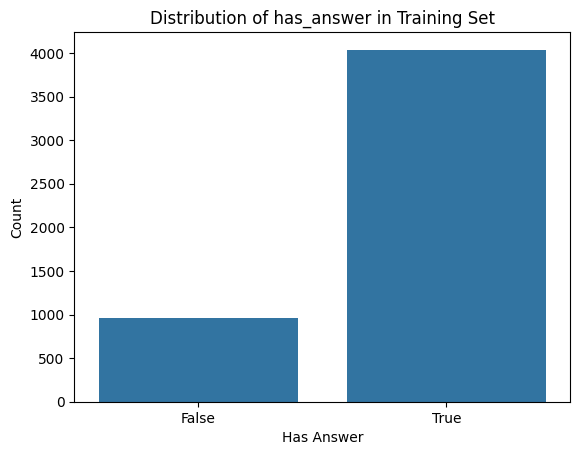

In [8]:
visualize_data(qna_dataset)


In [9]:
# filter dataset to remove un answered questions
qna_dataset = qna_dataset.filter( lambda x : x["has_answer"]== True)

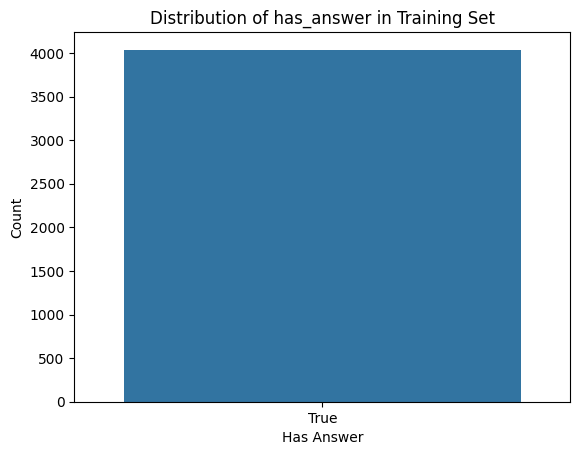

In [10]:
visualize_data(qna_dataset)

In [11]:
# extract text column from dataset  as List
doc_text = list(qna_dataset["train"]["text"])

In [12]:
# extract metadata of text
metadata = [
    {
    "source":rec ["source"],
    "title":rec ["title"]
    }
    for rec in qna_dataset["train"]
]

In [13]:
# generate ids for text
text_ids =[
    str(i)
    for i in range(len(doc_text))
]

## Text Embedding Generation
- Uses multilingual sentence transformer model
- Converts Arabic text into high-dimensional vectors (embeddings)
- Captures semantic meaning of questions and answers

In [14]:
# load model
model = SentenceTransformer(model_id,device=device)

In [15]:
# Text Embedding
encoded_text= model.encode(doc_text,show_progress_bar=True)

Batches:   0%|          | 0/127 [00:00<?, ?it/s]

In [16]:
# Print shape of encoded text
encoded_text.shape

(4037, 512)

## Vector DB (faiss)
- Builds FAISS index for ultra-fast similarity search
- Implements cosine similarity matching
- Normalizes embeddings for accurate comparison

In [17]:
norm_encoded_docs = deepcopy(encoded_text)
faiss.normalize_L2(norm_encoded_docs)

In [18]:
faiss_index = faiss.IndexIDMap(faiss.IndexFlatIP(dim))
faiss_index.add_with_ids(norm_encoded_docs,text_ids)

## Results

In [19]:
question = "ما السبب في صغر الأسنان"
question_embd = model.encode(question)

question_embd = question_embd.reshape(1, -1)
faiss.normalize_L2(question_embd)

results = faiss_index.search(question_embd,3)

In [20]:
results

(array([[0.4892013 , 0.4892013 , 0.37133065]], dtype=float32),
 array([[1534,  397, 3407]]))

In [21]:
doc_text[1534]

'جميع الأسنان ذات حجم طبيعي ولكنها تبدو صغيرة بسبب ضخامة الفكين. قد يكون الصغر النسبي المعمم نتيجة وراثة فك كبير من أحد الوالدين، وأسنان ذات حجم طبيعي من الآخر.'

## 👥 Contributors

| 👤 Name | 🧑‍💻 Role | 📬 GitHub | 🔗 LinkedIn |
|---------|----------|-----------|------------|
| Muhammad Ibrahim | Maintainer | [MuhammadSenna](https://github.com/MuhammadSenna) | [muhammad-senna](https://linkedin.com/in/muhammad-senna) |

© 2025 Muhammad Ibrahim. All Rights Reserved.

*Last updated: Jul 30, 2025*